In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,BaggingClassifier
from sklearn.model_selection import cross_val_score

dataset = pd.read_csv('Data/spambase.data', header=None)
X = dataset.iloc[:, :-1].values
t = dataset.iloc[:, -1].values
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 1/3)

## Decision tree classifier

In [92]:
iteration = 500
score = np.zeros(iteration)
for i in range (iteration):
    tree_clf = DecisionTreeClassifier(criterion='entropy',splitter='random', max_leaf_nodes= i+2 )
    tree_clf.fit(X_train, t_train)
    score[i] = np.mean(np.asarray(cross_val_score(tree_clf, X_test, t_test, cv=5)))

print(np.argmax(score))

99


Text(0.5, 1.0, 'Cross-validation error of decision tree vs Maximum number of leaves')

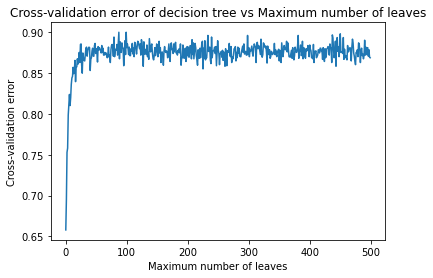

In [93]:
plt.plot(score)
plt.xlabel("Maximum number of leaves")
plt.ylabel("Cross-validation error")
plt.title("Cross-validation error of decision tree vs Maximum number of leaves")

## Bagging classifiers

In [94]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),
		n_estimators=50,
		max_samples=100,
		n_jobs=-1)
bag_clf.fit(X_train, t_train)
print(cross_val_score(bag_clf, X_test, t_test, cv=5))

[0.89576547 0.89576547 0.92508143 0.9218241  0.88888889]
